In [2]:
import math
import pandas_datareader as web 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [36]:
#Get the data from yahoo 
df=web.DataReader('TATAMOTORS.BO',data_source='yahoo',start='2015-01-01',end='2020-06-30')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,494.459015,487.385010,487.385010,492.975006,108635.0,492.774963
2015-01-02,511.428009,491.243988,491.243988,506.282990,302694.0,506.077545
2015-01-05,520.431030,502.028015,505.985992,518.552002,589915.0,518.341553
2015-01-06,509.350006,493.717010,509.350006,495.795013,500767.0,495.593811
2015-01-07,495.398987,484.218994,491.095001,488.769989,567639.0,488.571655
...,...,...,...,...,...,...
2020-06-25,106.199997,101.599998,104.000000,103.849998,3238756.0,103.849998
2020-06-26,106.000000,100.449997,105.650002,101.550003,4535729.0,101.550003
2020-06-29,101.300003,98.050003,101.000000,99.500000,3522342.0,99.500000


In [37]:
df.shape

(1351, 6)

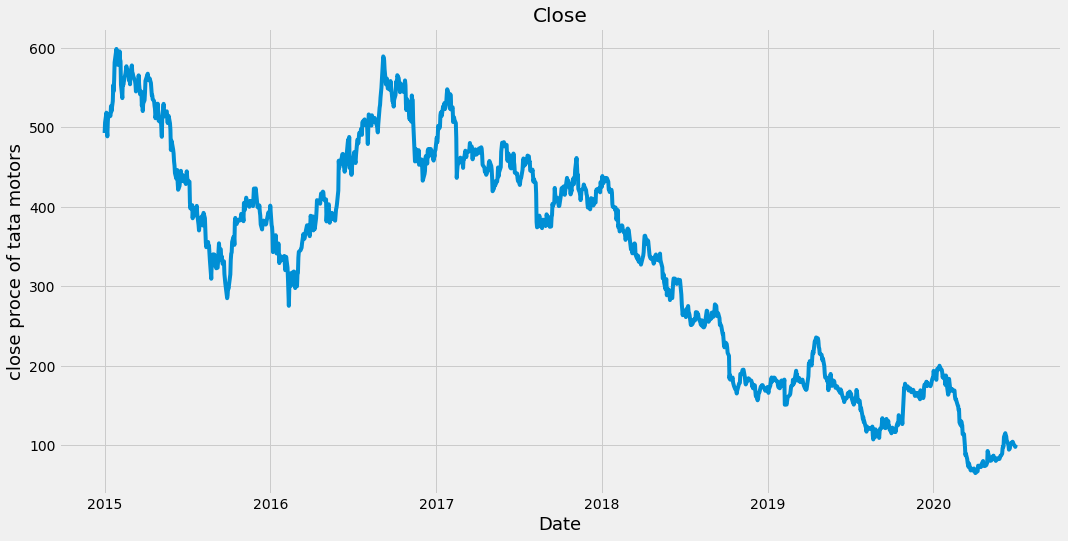

In [38]:
plt.figure(figsize=(16,8))
plt.title('Close')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close proce of tata motors',fontsize=18)
plt.show()

In [39]:
#crete new data frame with only close colomn
data=df.filter(['Close'])
#convert data frame into numpy array 
dataset=data.values
#get the number of rows to train the model on 
training_data_len=math.ceil(len(dataset)* .8)
training_data_len

1081

In [40]:
#scale the data
scaler =MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.80179948],
       [0.82674911],
       [0.84975089],
       ...,
       [0.0641177 ],
       [0.06177422],
       [0.06636744]])

In [41]:
#create the training the data set
#create the scaled training data set
train_data=scaled_data[0:training_data_len , :]
#slipt the data 
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.80179948, 0.82674911, 0.84975089, 0.80708639, 0.79391597,
       0.82767529, 0.84557576, 0.84659749, 0.84131057, 0.84279356,
       0.86523848, 0.85253309, 0.87692409, 0.91467294, 0.9003889 ,
       0.92802885, 0.96809498, 1.        , 0.97041409, 0.98590168,
       0.96262247, 0.97625587, 0.994342  , 0.97542157, 0.9711565 ,
       0.91587832, 0.88406702, 0.92441053, 0.91495031, 0.92116524,
       0.92682335, 0.94221917, 0.95919157, 0.94732037, 0.95121435,
       0.94221917, 0.92570974, 0.92997676, 0.91671262, 0.94509314,
       0.96113948, 0.94342467, 0.94203357, 0.93609796, 0.92422492,
       0.91662073, 0.89983393, 0.92385555, 0.91087084, 0.91226194,
       0.93776655, 0.91652701, 0.90391351, 0.89334152, 0.89946272,
       0.86607277, 0.88146848, 0.85355299, 0.87135969, 0.87915131])]
[0.8977004195527888]

[array([0.80179948, 0.82674911, 0.84975089, 0.80708639, 0.79391597,
       0.82767529, 0.84557576, 0.84659749, 0.84131057, 0.84279356,
       0.86523848, 0.85253309, 0.876

In [42]:
#convert x_train and y_train in to numpy arrays 
x_train,y_train=np.array(x_train),np.array(y_train)

In [43]:
#reshape because of LSTM 
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1021, 60, 1)

In [191]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape= (x_train.shape[1], 1)))
model.add(LSTM(100,return_sequences=True,input_shape= (x_train.shape[1],1)))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(50))
model.add(Dense(25))
model.add(Dense(1))

In [192]:
#compile the model 
model.compile(optimizer='adam',loss='mean_squared_error')

In [193]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1021/1021 [==============================] - 79s 77ms/step - loss: 0.0053


In [194]:
#create the testing data set 
#create a new array 
test_data=scaled_data[training_data_len-60: , :]
#create the data sets x_test and y_test 
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [195]:
#convert the data to numpy array 
x_test=np.array(x_test)

In [196]:
#reshape the data 
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [197]:
#get the model predicted price values 
predictions=model.predict(x_test)
predictions= scaler.inverse_transform(predictions)


In [198]:
#model evaluation
rmse =np.sqrt( np.mean(predictions-y_test)**2)
rmse

1.6221412376121238

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


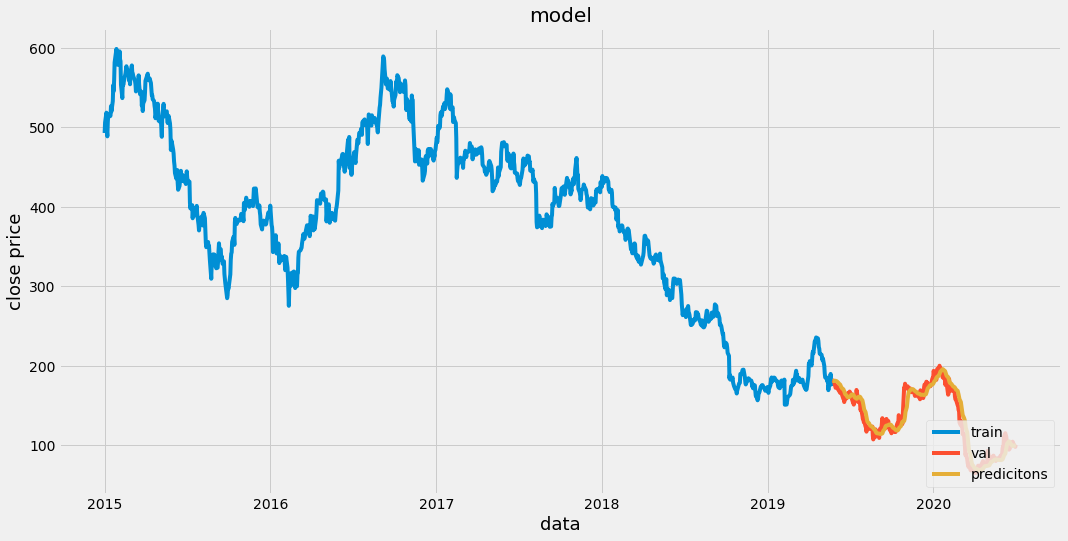

In [199]:
#plot the data 
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
#visualize the model
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('data',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','val','predicitons'],loc='lower right')
plt.show()



In [200]:
#show the actual and predicted 
valid

,Close,predictions
Date,,
2019-05-24,182.149994,181.193527
2019-05-27,181.350006,181.078644
2019-05-28,180.750000,181.188568
2019-05-29,176.300003,181.423218
2019-05-30,175.050003,181.503052
...,...,...
2020-06-25,103.849998,99.227066
2020-06-26,101.550003,99.529099
2020-06-29,99.500000,99.929482


In [201]:
#predict future the data 
tata_future=web.DataReader('TATAMOTORS.BO',data_source='yahoo',start='2015-01-01',end='2020-06-30')
#new data frame
new_df=tata_future.filter(['Close'])
#get last 60 days data 
last_data=new_df[-60:].values
#scale the data to be values between 0 and 1 
last_data_scaled=scaler.transform(last_data)
#create empty list 
X_test=[]
X_test.append(last_data_scaled)
#convert the x test data set into numpy array 
X_test=np.array(X_test)
#reshape the data 
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 1))
#get the predicted the scale price 
pred_price=model.predict(X_test)
#undo the scaling 
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[100.14357]]


In [135]:
tata_future2=web.DataReader('TATAMOTORS.BO',data_source='yahoo',start='2020-07-02',end='2020-07-02')
tata_future2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-02,102.949997,100.449997,101,101.550003,1870677,101.550003
